In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from qiskit import QuantumRegister, QuantumCircuit, execute
import qiskit.extensions.simulator

from qiskit_aqua import Operator, run_algorithm
from qiskit_aqua.input import get_input_instance
from qiskit_aqua import get_eigs_instance, get_reciprocal_instance

from qiskit_aqua.utils import random_hermitian, random_non_hermitian

from qiskit.tools.visualization import plot_circuit

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
# from qiskit_aqua.algorithms.components.reciprocals.lookup_rotation import LookupRotation
from qiskit_aqua.algorithms.single_sample.hhl.hhl import HHL

In [4]:
#specify problem
#matrix = random_hermitian(4, eigrange=(1, 4), trunc=2)
matrix = np.array([[1, 0], [0, 3]])

invec = np.array([1,1])

reciprocal_methods = ["LOOKUP"]

In [10]:
params = {
    "algorithm": {
        "name": "HHL",
        "mode": "state_tomography"
    },
    "eigs": {
        "name": "QPE",
        "num_time_slices": 20,
        "expansion_mode": "suzuki",
        "negative_evals": False,
        "num_ancillae": 6,
        "expansion_order":2,
        #"evo_time": np.pi/2,
    },
    "initial_state": {
        "name": "CUSTOM",
        
    },
    "reciprocal": {
        #"lambda_min": 1,
    },
    "backend": {
        "name": "local_qasm_simulator",
        "shots": 1
    }
}

In [11]:
res_dict={}
for method in reciprocal_methods:
    params["reciprocal"]["name"]= method
    ret = run_algorithm(params, (matrix,invec))
    res_dict.update({method:ret})

In [7]:
def print_vector(vec_name,method,b):
    vec = "${}_{{{}}}$".format(vec_name,method)+'$\\begin{pmatrix}' + str(b[0]) + r'\\' + str(b[1]) + '\\end{pmatrix}$'

    display(Markdown(vec))
    
def compare_results(res_dict,show_vector=True):
    methods = list(res_dict.keys())
    res_list = [res_dict[i] for i in methods]
    features = np.array(list(res_list[0].keys()))
    #1. numeric output
    mask = [np.isscalar(res_list[0][feat]) for feat in features]
    num_numeric = sum(mask)
    feat_numeric = features[mask]
    #2. array like output
    mask = [isinstance(res_list[0][feat],(list,np.ndarray)) for feat in features]
    num_array = sum(mask)
    feat_array = features[mask]
    
    fig,axs = plt.subplots(num_numeric,1)
    for n,res in enumerate(res_list):
        for i,feat in enumerate(feat_numeric):
            axs[i].bar(n,res[feat])
        if show_vector:
            for i,feat in enumerate(feat_array):
                print_vector(feat,methods[n],res[feat])
    for i in range(num_numeric):
        axs[i].set_ylabel(feat_numeric[i])
        axs[i].set_xticks(np.arange(len(res_list)))
        axs[i].set_xticklabels(methods)
    
    plt.tight_layout()
    plt.show()
        

$result_{LOOKUP}$$\begin{pmatrix}(0.9486832980504961+1.2697812132516125e-13j)\\(0.3162277660168909+1.288525035165834e-13j)\end{pmatrix}$

$solution_{LOOKUP}$$\begin{pmatrix}(0.9999999999999069+6.751607775916047e-13j)\\(0.33333333333336435+3.1626049292890277e-13j)\end{pmatrix}$

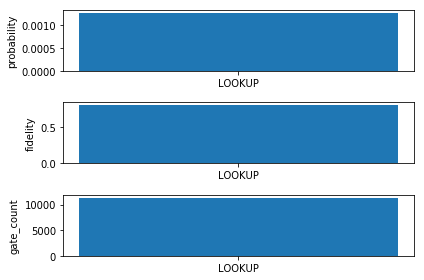

In [12]:
compare_results(res_dict,show_vector=True)

In [9]:
res_dict

{'LOOKUP': {'probability': (0.001259763164525253+0j),
  'result': array([0.9486833 +1.21173209e-13j, 0.31622777+1.33459102e-13j]),
  'gate_count': 11375}}